In [1]:
import sys
sys.path.append('/home/bruce/git/GLFM/src/GLFMpython/')
import GLFM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score

ModuleNotFoundError: No module named 'sklearn'

In [167]:
df = pd.read_csv('/home/bruce/latentTest4.1024.1000.csv',header=None,index_col=False)

In [171]:
X = (1+(df[df.columns[:]]).astype('float').to_numpy())[:64]

In [172]:
C = np.tile('c',(1,X.shape[1]))[0].tostring()

In [173]:
X.shape

(64, 1024)

In [6]:
data = dict()
hidden = dict()
params = dict()

data['X'] = X
data['C'] = C


NameError: name 'X' is not defined

In [4]:

Kinit = 1 # initial number of latent features
hidden['Z'] = np.random.randint(0,2,size=(X.shape[0],Kinit)).astype('float64')
hidden['B'] = np.random.randint(0,2,size=(X.shape[1],Kinit,2)).astype('float64')
hidden['R'] = []
hidden['s2Y'] = []
for i in range(X.shape[1]):
    hidden['R'].append(np.array([1., 2.]))
    hidden['s2Y'].append(1.0)

NameError: name 'X' is not defined

In [210]:
params['alpha'] = 4  # concentration parameter for the IBP
params['Niter'] = 50 # number of algorithm iterations
params['maxK'] = 20

In [211]:
hidden = GLFM.infer(data, hidden, params)

N=64, D=1024, K=1

[[1. 1. 1. ... 2. 1. 2.]
 [1. 1. 1. ... 2. 1. 2.]
 [1. 1. 1. ... 2. 1. 2.]
 ...
 [1. 1. 2. ... 1. 1. 2.]
 [1. 1. 2. ... 1. 1. 2.]
 [1. 1. 2. ... 1. 1. 2.]]
[[1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
  1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0.
  1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.]]
In C++: transforming input data...
done

maxR = 2

Entering C++: Running Inference Routine...


Back to Python: OK

Kest=2, N=64

Z_out loaded
B_out[D,Kest,maxR] where D=1024, Kest=2, maxR=2
B_out loaded
theta_out loaded

	Elapsed time: 4.68 seconds.



In [213]:
ii = [];
ll = []; 
kk = []; 
mm = []; 

X_map = GLFM.computeMAP(data['C'], hidden['Z'], hidden, params)
loglik = GLFM.compute_log_likelihood(data['X'],data['C'],hidden,params)
ii.append(0)
ll.append(loglik.sum())
kk.append(hidden['B'].shape[1])
mm.append(mutual_info_score(X.flatten(),X_map.flatten()))


In [243]:
for i in range(10):
    hidden = GLFM.infer(data, hidden, params)
    loglik = GLFM.compute_log_likelihood(data['X'],data['C'],hidden,params)
    X_map = GLFM.computeMAP(data['C'], hidden['Z'], hidden, params)
    ii.append((i+1)*params['Niter'])
    ll.append(loglik.sum())
    kk.append(hidden['B'].shape[1])
    mm.append(mutual_info_score(X.flatten(),X_map.flatten()))
    print(mm)

N=64, D=1024, K=4

[[1. 1. 1. ... 2. 1. 2.]
 [1. 1. 1. ... 2. 1. 2.]
 [1. 1. 1. ... 2. 1. 2.]
 ...
 [1. 1. 2. ... 1. 1. 2.]
 [1. 1. 2. ... 1. 1. 2.]
 [1. 1. 2. ... 1. 1. 2.]]
[[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1.
  0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
  1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.]]
In C++: transforming input d

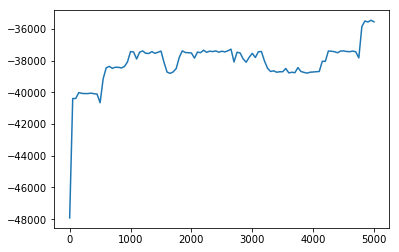

In [232]:
plt.plot(ii,ll)

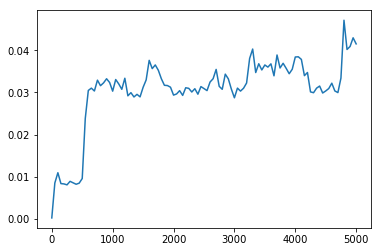

In [233]:
plt.plot(ii,mm)

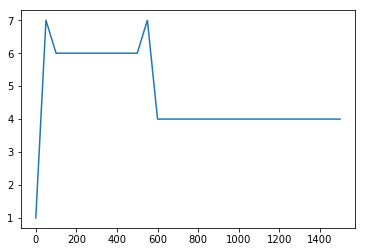

In [217]:
plt.plot(ii,kk)

In [234]:
patterns = hidden['Z']
X_map = GLFM.computeMAP(data['C'], patterns, hidden, params)

In [235]:
X_map.shape

(64, 1024)

In [236]:
Kest = hidden['B'].shape[1] # number of inferred latent features
D = hidden['B'].shape[0]    # number of dimensions

dim=0



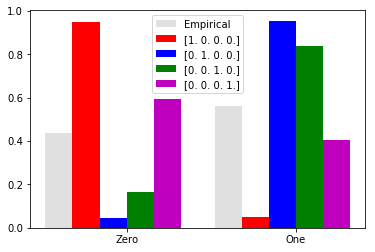

dim=1



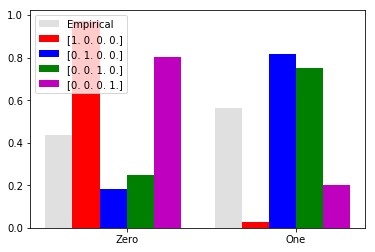

dim=2



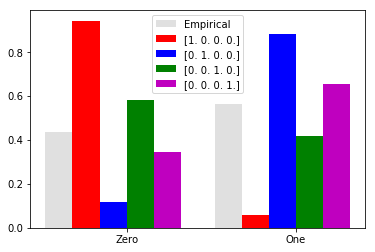

dim=3



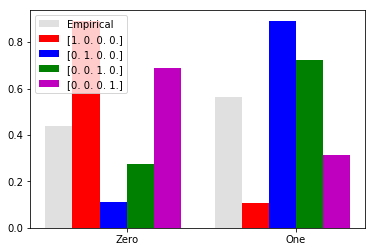

dim=4



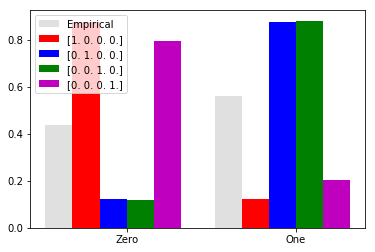

dim=5



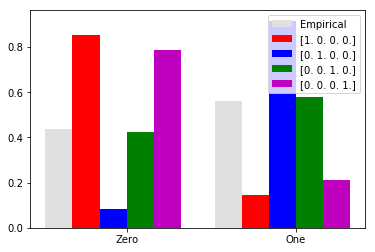

dim=6



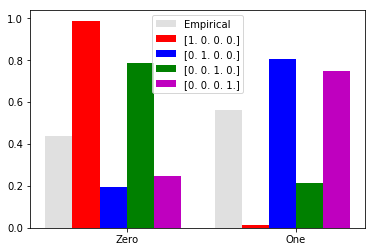

dim=7



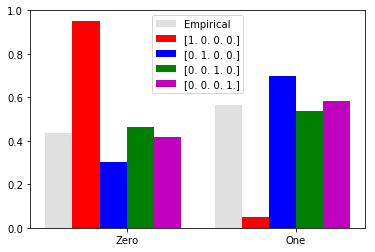

dim=8



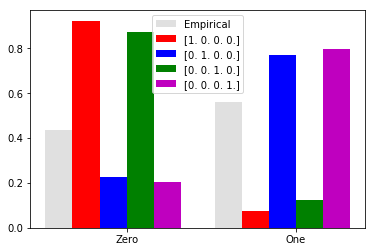

dim=9



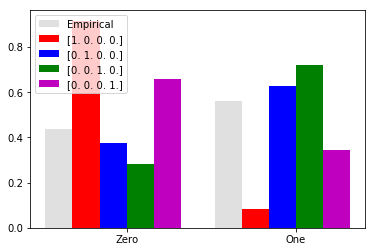

dim=10



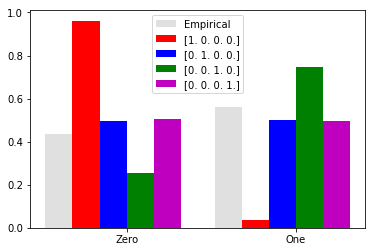

dim=11



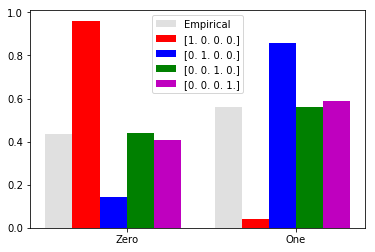

dim=12



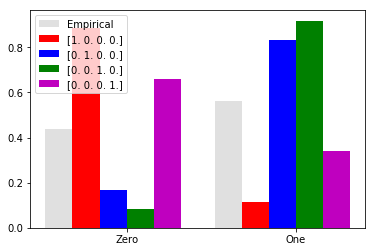

dim=13



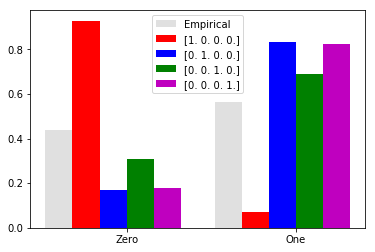

dim=14



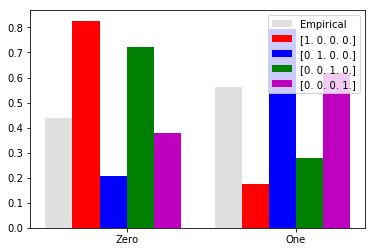

dim=15



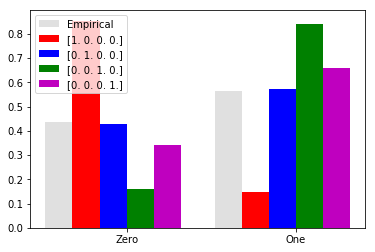

dim=16



IndexError: list index out of range

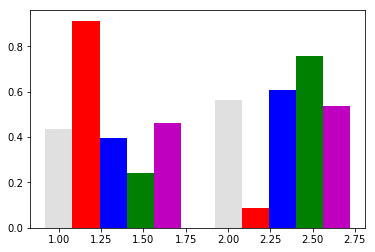

In [237]:
# choose patterns corresponding to activation of each feature
Zp = np.eye(Kest)
leg = ['F0','F1', 'F2', 'F3', 'F4'];
GLFM.plotPatterns(data, hidden, params, Zp, [], [])

In [188]:
data['cat_labels'] = [["Zero","One"],["Zero","One"],["Zero","One"],["Zero","One"],["Zero","One"],["Zero","One"],["Zero","One"],["Zero","One"],["Zero","One"],["Zero","One"],["Zero","One"],["Zero","One"],["Zero","One"],["Zero","One"],["Zero","One"],["Zero","One"]]


In [238]:
hidden["Z"]

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 1., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


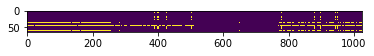

In [239]:
plt.imshow(X_map)

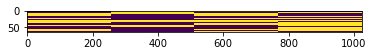

In [240]:
plt.imshow(X)

In [241]:
N = X.shape[0]

In [231]:
## Plot Dimensions
sum(hidden['Z'])
th = 0.01 # threshold to filter out latent features that are not significant
feat_select = np.nonzero(sum(hidden['Z']) >= N*th)[0] # filter features with insufficient number of obs. assigned
hidden['Z']= hidden['Z'][:,feat_select]
hidden['B']= hidden['B'][:,feat_select,:]
sum(hidden['Z'])
[patterns, C, L] = GLFM.get_feature_patterns_sorted(hidden['Z'])



0. [0. 0. 0. 0.]: 34
1. [1. 0. 0. 0.]: 19
2. [0. 1. 0. 0.]: 6
3. [0. 1. 1. 1.]: 5


In [203]:
feat_select

array([], dtype=int64)

In [242]:
hidden["B"]

array([[[ 2.30853814,  0.        ],
        [-2.30943894,  0.        ],
        [-1.41768769,  0.        ],
        [ 0.33257935,  0.        ]],

       [[ 2.9349988 ,  0.        ],
        [-1.47458983,  0.        ],
        [-0.90107607,  0.        ],
        [ 1.221914  ,  0.        ]],

       [[ 2.31055456,  0.        ],
        [-1.74844759,  0.        ],
        [ 0.29301516,  0.        ],
        [-0.64309092,  0.        ]],

       ...,

       [[ 0.51858502,  0.        ],
        [ 0.52778043,  0.        ],
        [-1.18636056,  0.        ],
        [-0.71401387,  0.        ]],

       [[ 0.32857175,  0.        ],
        [-0.03276309,  0.        ],
        [-0.16915866,  0.        ],
        [-0.69405331,  0.        ]],

       [[ 0.30467182,  0.        ],
        [-0.34319588,  0.        ],
        [-1.74767252,  0.        ],
        [ 0.20419116,  0.        ]]])

In [186]:
hidden['Z']

array([[1., 0., 0., 0., 1., 1.],
       [0., 1., 0., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1.],
       ...,
       [1., 0., 0., 0., 1., 1.],
       [1., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 1., 1.]])

In [188]:
X[0]

array([2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2.])

dim=0



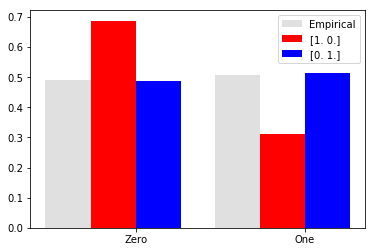

dim=1



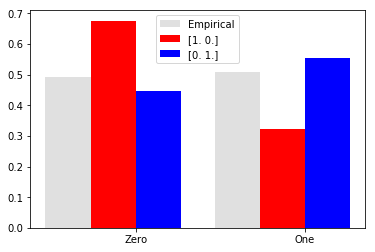

dim=2



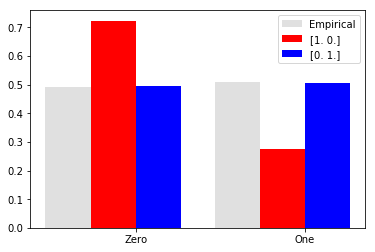

dim=3



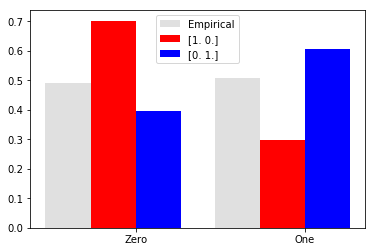

dim=4



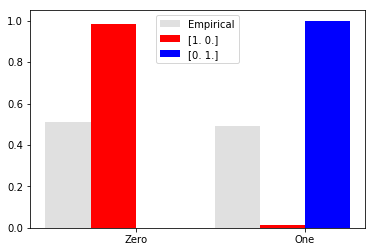

dim=5



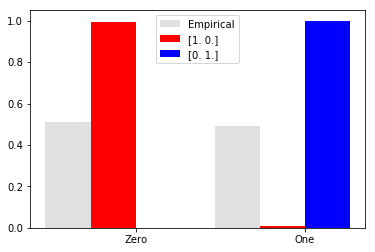

dim=6



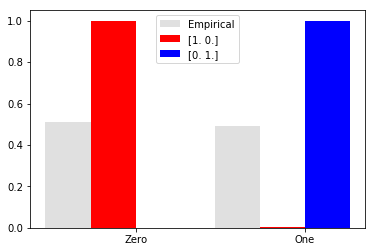

dim=7



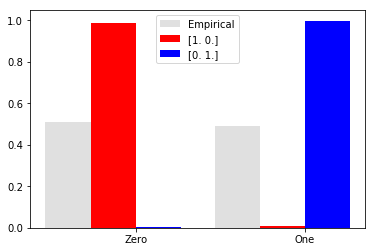

dim=8



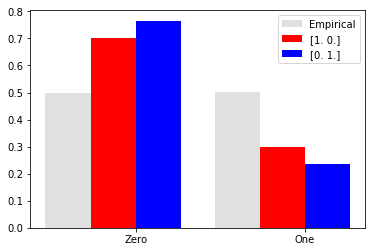

dim=9



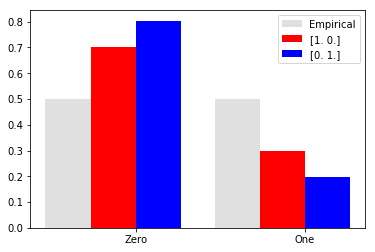

dim=10



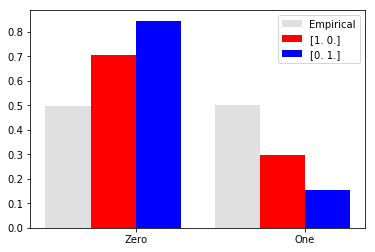

dim=11



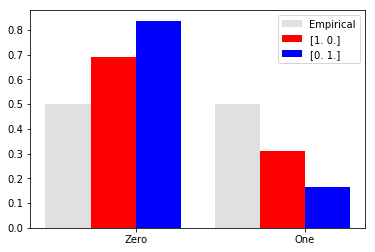

dim=12



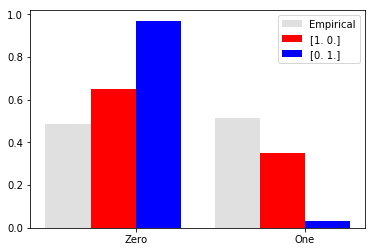

dim=13



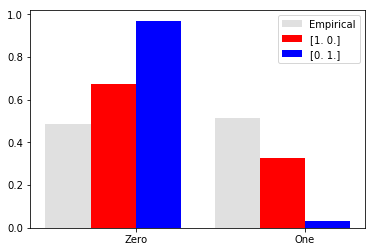

dim=14



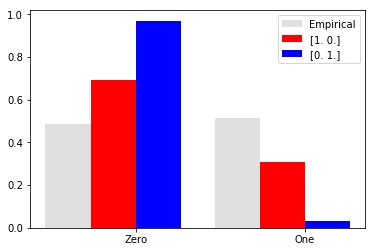

dim=15



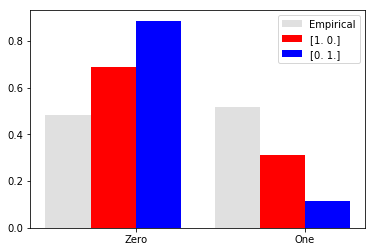

In [22]:
Kest = hidden['B'].shape[1] # number of inferred latent features
D = hidden['B'].shape[0]    # number of dimensions

# choose patterns corresponding to activation of each feature
Zp = np.eye(Kest)
leg = ['F0','F1', 'F2', 'F3', 'F4'];
GLFM.plotPatterns(data, hidden, params, Zp, [], [])


In [31]:
from sklearn.metrics import mutual_info_score

In [87]:
mutual_info_score([1,1,1,0,0,0,1],[1,1,1,0,0,0,0])

0.36157373634686685

In [33]:
mutual_info_score([1,1,1,0,0,0],[1,1,1,0,0,1])

0.3182570841474064

In [34]:
mutual_info_score([1,1,1,0,0,0],[0,0,0,1,1,1])

0.6931471805599452

In [61]:
mutual_info_score(np.random.randint(0,2,size=10),np.random.randint(0,2,size=10))

0.0040217432304827105

In [65]:
mutual_info_score(X.flatten(),X_map.flatten())

0.466350239168368